### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})

### Loading the dataset 
 * leads.csv file

## Table 1: Leads

In [2]:
leads = pd.read_csv(r'E:\Amits_Jupyter_Projects\Vahan\leads.csv', encoding='latin1')
leads

,id,userId,name,phoneNumber,city,state,source,isExternal,createdAt,receivedAt
0,00021a29-83e4-48d3-8cc3-0bc729f087fd,NaN,KUPENDRA,1234567890,NaN,NaN,Airavatha data,True,2019-12-26T18:17:13.115Z,2019-11-01T05:41:00Z
1,000743a8-3bd5-4e5a-97ed-dcf0af91aeb7,e50fccfe-82aa-434a-ad92-9d3f9d651f84,Dinkle Unknown,1234567890,Delhi/NCR,Delhi-NCR,delhi-18-33yo-10-15k-hdat-july-17,False,2019-12-26T17:49:53.471Z,2019-08-25T00:00:00Z
2,0013dc91-e0e3-48f6-9518-6cf8389dd923,NaN,Elikatte Kumaraswamy,1234567890,Hyderabad,Telangana,WhatsApp OptIn Form,False,2019-12-26T17:21:04.021Z,2019-07-25T00:00:00Z
3,001477a2-80d0-4b6d-a392-16aeaeef805d,4e0222f0-42aa-4660-976b-8e9329b4b1a7,Raju Unknown,1234567890,Hyderabad,Telangana,Referrals,False,2019-12-26T17:26:31.459Z,2019-06-03T00:00:00Z
4,0014961d-9b66-4cae-85aa-acb89cd51f1e,NaN,Arunkumar Unknown,1234567890,Bangalore,Karnataka,Reused Leads,False,2019-12-26T17:21:05.065Z,2019-04-01T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...
9911,ffd9d0e6-4407-4442-a9de-fadc76117b65,0f97f6be-6332-4bdc-ad13-1f9b6f6e3a29,Magesh A.m,1234567890,Chennai,Tamil Nadu,Quikr_Zomato_Chennai,False,2019-12-26T18:09:36.081Z,2019-10-15T18:14:00Z
9912,ffdcc8e7-2cff-42ce-9647-093a03449b91,8c60af4b-a92e-4808-9c7a-2bac36bf6f29,Sri Unknown,1234567890,Chennai,Tamil Nadu,Referrals,False,2019-12-26T17:26:33.135Z,2019-06-09T00:00:00Z
9913,ffdf0149-30e1-4ef6-8a3d-666717527548,NaN,Rajesh Unknown,1234567890,Hyderabad,Telangana,API,False,2019-12-26T17:22:16.350Z,2019-07-25T00:00:00Z
9914,ffe620cf-727b-4e2a-a201-ec2505b0f93f,NaN,Abhi Unknown,1234567890,Hyderabad,Telangana,Web Chat Referrals,False,2019-12-26T17:22:16.394Z,2019-05-01T00:00:00Z


### Feature Selection or Handling

1. Since leads id is uniquely identify each row, So we can drop this feature 
2. Since userId is used to refer internal database entry, This can also be dropped.
3. Similarly Name is not important.
4. Since phone number is all same in this data, or all different in the original data, It can be dropped.

In [3]:
leads['userId'].nunique()

5977

In [4]:
leads1 = leads.drop(['id', 'userId', 'name', 'phoneNumber'], axis=1)
leads1

,city,state,source,isExternal,createdAt,receivedAt
0,NaN,NaN,Airavatha data,True,2019-12-26T18:17:13.115Z,2019-11-01T05:41:00Z
1,Delhi/NCR,Delhi-NCR,delhi-18-33yo-10-15k-hdat-july-17,False,2019-12-26T17:49:53.471Z,2019-08-25T00:00:00Z
2,Hyderabad,Telangana,WhatsApp OptIn Form,False,2019-12-26T17:21:04.021Z,2019-07-25T00:00:00Z
3,Hyderabad,Telangana,Referrals,False,2019-12-26T17:26:31.459Z,2019-06-03T00:00:00Z
4,Bangalore,Karnataka,Reused Leads,False,2019-12-26T17:21:05.065Z,2019-04-01T00:00:00Z
...,...,...,...,...,...,...
9911,Chennai,Tamil Nadu,Quikr_Zomato_Chennai,False,2019-12-26T18:09:36.081Z,2019-10-15T18:14:00Z
9912,Chennai,Tamil Nadu,Referrals,False,2019-12-26T17:26:33.135Z,2019-06-09T00:00:00Z
9913,Hyderabad,Telangana,API,False,2019-12-26T17:22:16.350Z,2019-07-25T00:00:00Z
9914,Hyderabad,Telangana,Web Chat Referrals,False,2019-12-26T17:22:16.394Z,2019-05-01T00:00:00Z


### Handle Datatype and Missing Values

1. find how many missing values are there in city, state, source and isExternal
2. convert createdAt and receivedAt feature to datetime datatype
3. convert boolean isExternal into 0 and 1 integer datatype

In [5]:
leads1.dtypes

city          object
state         object
source        object
isExternal      bool
createdAt     object
receivedAt    object
dtype: object

In [6]:
leads1['createdAt'] = pd.to_datetime(leads1['createdAt'])
leads1['receivedAt'] = pd.to_datetime(leads1['receivedAt'])
leads1.isExternal = leads1.isExternal.astype(int)
leads1.dtypes

city                       object
state                      object
source                     object
isExternal                  int32
createdAt     datetime64[ns, UTC]
receivedAt    datetime64[ns, UTC]
dtype: object

### Insights
 * We have to take <b>city</b> name as well while creating data because around <b>7.5 % </b> data doesn't have city mensioned
 * Overall We are doing good in <b>Hyderabad, Bangalore, Chennai, Delhi/NCR, Mumbai, Delhi, Mysore</b>
 * But We also need to improve in other cities as well

In [7]:
# leads1['city'].isnull().sum() ## 738 ## 7.44%
# leads1['city'].nunique() ## 61
leads1['city'].value_counts().head(10)

Hyderabad      3413
Bangalore      2273
Chennai        1282
Delhi/NCR       894
Mumbai          536
Delhi           353
Mysore          173
Pondicherry      21
Patna            21
Kerala           20
Name: city, dtype: int64

### Insights
 * We have to take <b>state</b> name as well while creating data because around <b>14 %</b> data doesn't have state mensioned
 * Overall We are doing good in <b>Telangana, Karnataka, Tamilnadu, Delhi, Maharashta</b>
 * But We also need to improve in other states as well

In [8]:
# leads1['state'].isnull().sum() ## 1380 ## 13.91%
# leads1['state'].nunique() ## 20
leads1['state'].value_counts().head(10)

Telangana         3426
Karnataka         1990
Tamil Nadu        1243
Delhi             1200
Maharashtra        541
Delhi-NCR           52
Andhra Pradesh      26
Bihar               23
West Bengal          7
Assam                6
Name: state, dtype: int64

### Insights
 * <b>Referrals, API, WhatsApp OptIn Form, Facebook</b> are the main sources of leads

In [9]:
# leads1['source'].isnull().sum() ## 2
# leads1['source'].nunique() ##108
leads1['source'].value_counts().head(20)

Referrals                          3656
API                                1233
WhatsApp OptIn Form                1138
Facebook                            654
unknown                             369
Airavatha data                      319
delhi-lal-july-30-1mil-b3           245
Reused Leads                        231
Web Chat Referrals                  177
delhi-lal-july-29-1mil-b2           175
delhi-lal-july-31-1mil-b4           154
Sandeep                             101
delhi-lal-july-26-1mil-rep           91
Ubereats Existing list               79
delhi-lal-july-26-1mil               78
CorpW                                65
lynk-mas-qkr-oct3                    54
atl-reeng-sms                        50
blr-nrby-aug-2                       49
Delivery_lynk_che_tam_08 Nov 19      45
Name: source, dtype: int64

### Insights 1

* We have <b>13.58 %</b> External leads. This needs to be minimised.
* We can also have a look from which cities or states these leads coming from, So that We can improve in those cities

In [10]:
# leads1['isExternal'].isnull().sum() ## 0
# leads1['isExternal'].nunique() ##2
leads1['isExternal'].value_counts(normalize=True)*100

0    86.415894
1    13.584106
Name: isExternal, dtype: float64

In [11]:
leads2 = leads1[['city', 'isExternal', 'source']].groupby(['city','isExternal']).count()
leads2 = leads2.reset_index()
leads2 = leads2.pivot(index='city', columns='isExternal', values='source')
del leads2.columns.name
leads2 = leads2.reset_index()
leads2.columns=['city', 'LeadsByJobAssist', 'LeadsByExternal']

### Insights 2 Citywise Performance

 * We have are doing good in <b>Hyderabad, Bengalore, Chennai, Delhi/NCR, Mumbai and Delhi</b>

In [12]:
leads20 = leads2.sort_values(by='LeadsByJobAssist', ascending=False)
leads20.reset_index(inplace=True)
# leads20.to_csv('leads20.csv', index=False)
leads20.head(10)

,index,city,LeadsByJobAssist,LeadsByExternal
0,20,Hyderabad,3374.0,39.0
1,4,Bangalore,1678.0,593.0
2,11,Chennai,1219.0,63.0
3,16,Delhi/NCR,891.0,3.0
4,37,Mumbai,536.0,NaN
5,15,Delhi,352.0,1.0
6,42,Patna,21.0,NaN
7,13,Coimbatore,16.0,4.0
8,57,Warangal,10.0,2.0
9,26,Karimnagar,9.0,NaN


### Insights 3 Citywise Improvements

 * We need to improve in <b>Bangalore and Mysore</b>

In [13]:
leads21 = leads2.sort_values(by='LeadsByExternal', ascending=False)
leads21.reset_index(inplace=True)
# leads21.to_csv('leads21.csv', index=False)
leads21.head(10)

,index,city,LeadsByJobAssist,LeadsByExternal
0,4,Bangalore,1678.0,593.0
1,38,Mysore,4.0,169.0
2,11,Chennai,1219.0,63.0
3,20,Hyderabad,3374.0,39.0
4,43,Pondicherry,NaN,21.0
5,27,Kerala,NaN,20.0
6,7,Belagavi,NaN,12.0
7,58,Yadhgirir,NaN,10.0
8,33,Madurai,5.0,6.0
9,0,Ahmedabad,1.0,6.0


In [14]:
leads3 = leads1[['state', 'isExternal', 'source']].groupby(['state','isExternal']).count()
leads3 = leads3.reset_index()
leads3 = leads3.pivot(index='state', columns='isExternal', values='source')
del leads3.columns.name
leads3 = leads3.reset_index()
leads3.columns=['state', 'LeadsByJobAssist', 'LeadsByExternal']

### Insights 4 Statewise Performance

 * We are doing good in <b>Telangana, Karnataka, Tamilnadu, Delhi, Maharashtra</b>

In [15]:
leads30 = leads3.sort_values(by='LeadsByJobAssist', ascending=False)
# leads30.to_csv('leads30.csv', index=False)
leads30.head(10)

,state,LeadsByJobAssist,LeadsByExternal
16,Telangana,3394.0,32.0
9,Karnataka,1662.0,326.0
14,Tamil Nadu,1242.0,1.0
6,Delhi,1196.0,4.0
10,Maharashtra,541.0,NaN
7,Delhi-NCR,52.0,NaN
1,Andhra Pradesh,26.0,NaN
4,Bihar,23.0,NaN
19,West Bengal,7.0,NaN
2,Assam,6.0,NaN


### Insights 5 Statewise Improvements

 * We need to improve in <b>Karnataka</b>

In [16]:
leads31 = leads3.sort_values(by='LeadsByExternal', ascending=False)
# leads31.to_csv('leads31.csv', index=False)
leads31.head(10)

,state,LeadsByJobAssist,LeadsByExternal
9,Karnataka,1662.0,326.0
16,Telangana,3394.0,32.0
6,Delhi,1196.0,4.0
14,Tamil Nadu,1242.0,1.0
15,Tamilnadu,NaN,1.0
18,Uttar Pradesh,3.0,1.0
0,#REF!,1.0,NaN
1,Andhra Pradesh,26.0,NaN
2,Assam,6.0,NaN
3,Bangalore,1.0,NaN


### Insights 6 Duration between when lead was received by us and the time of creation of the table enry

 * Maximun <b>317 days</b>
 * Minimum <b>27 days</b>
 * Average <b>162 days</b>
 * We need to <b>minimise this duration</b>, i.e, we must get the entries in table as early we receive the leads as possible

In [17]:
leads1['duration'] = pd.to_timedelta(leads1['createdAt'] - leads1['receivedAt'])
leads1['duration'] = leads1['duration'].dt.days
print(leads1['duration'].max())
print(leads1['duration'].min())
print(leads1['duration'].mean())
leads1

317
27
162.6668011294877


,city,state,source,isExternal,createdAt,receivedAt,duration
0,NaN,NaN,Airavatha data,1,2019-12-26 18:17:13.115000+00:00,2019-11-01 05:41:00+00:00,55
1,Delhi/NCR,Delhi-NCR,delhi-18-33yo-10-15k-hdat-july-17,0,2019-12-26 17:49:53.471000+00:00,2019-08-25 00:00:00+00:00,123
2,Hyderabad,Telangana,WhatsApp OptIn Form,0,2019-12-26 17:21:04.021000+00:00,2019-07-25 00:00:00+00:00,154
3,Hyderabad,Telangana,Referrals,0,2019-12-26 17:26:31.459000+00:00,2019-06-03 00:00:00+00:00,206
4,Bangalore,Karnataka,Reused Leads,0,2019-12-26 17:21:05.065000+00:00,2019-04-01 00:00:00+00:00,269
...,...,...,...,...,...,...,...
9911,Chennai,Tamil Nadu,Quikr_Zomato_Chennai,0,2019-12-26 18:09:36.081000+00:00,2019-10-15 18:14:00+00:00,71
9912,Chennai,Tamil Nadu,Referrals,0,2019-12-26 17:26:33.135000+00:00,2019-06-09 00:00:00+00:00,200
9913,Hyderabad,Telangana,API,0,2019-12-26 17:22:16.350000+00:00,2019-07-25 00:00:00+00:00,154
9914,Hyderabad,Telangana,Web Chat Referrals,0,2019-12-26 17:22:16.394000+00:00,2019-05-01 00:00:00+00:00,239


In [18]:
leads1.drop(['duration'], axis=1, inplace=True)
leads11 = leads1.copy()

### Insights 7 When did entries created in the table

 * on 26 Dec 2019 between 17:00 to 19:00

In [19]:
leads11['createdAt_day'] = leads11['createdAt'].dt.day
leads11['createdAt_day'].value_counts()

26    9916
Name: createdAt_day, dtype: int64

In [20]:
leads11['createdAt_hour'] = leads11['createdAt'].dt.hour
leads11['createdAt_hour'].value_counts()

17    7696
18    2220
Name: createdAt_hour, dtype: int64

### Insights 8 When the leads was received by us

 * Dates are between <b>12 feb 2019 to 29 Nov 2019</b>
 * Majority of people received on <b>2019-07-25, 2019-05-01, 2019-04-01, 2019-11-01, 2019-08-01, 2019-07-30, 2019-06-09, 2019-06-08, 2019-08-02, 2019-11-03</b> respectively

In [21]:
leads11['receivedAt_date'] = leads11['receivedAt'].dt.date
leads11['receivedAt_date'].value_counts().head(10)

2019-07-25    2283
2019-05-01    1548
2019-04-01     627
2019-11-01     582
2019-08-01     371
2019-07-30     283
2019-06-09     269
2019-06-08     250
2019-08-02     231
2019-11-03     201
Name: receivedAt_date, dtype: int64

In [22]:
leads11['receivedAt_date'].min()

datetime.date(2019, 2, 12)

In [23]:
leads11['receivedAt_date'].max()

datetime.date(2019, 11, 29)

In [24]:
leads11['receivedAt_dt_doy'] = pd.to_datetime(leads11['receivedAt'])
leads11['receivedAt_dt_doy'] = leads11['receivedAt_dt_doy'].dt.dayofyear
# leads11['receivedAt_dt_doy'].min() ## 43
# leads11['receivedAt_dt_doy'].max() ## 333

In [25]:
leads110 = leads11[leads11['isExternal']==0]
leads111 = leads11[leads11['isExternal']==1]

In [26]:
df_time110 = leads110[['receivedAt_dt_doy', 'isExternal']].groupby('receivedAt_dt_doy').count()
df_time110.reset_index(inplace=True)

In [27]:
df_time111 = leads111[['receivedAt_dt_doy', 'isExternal']].groupby('receivedAt_dt_doy').count()
df_time111.reset_index(inplace=True)

In [28]:
df_time11 = leads11[['receivedAt_dt_doy', 'isExternal']].groupby('receivedAt_dt_doy').count()
df_time11.reset_index(inplace=True)

### Insights 9 Number of leads via job assist is increasing over time

 * Assuming maximum number of leads via <b>job assist</b> in a day is 150

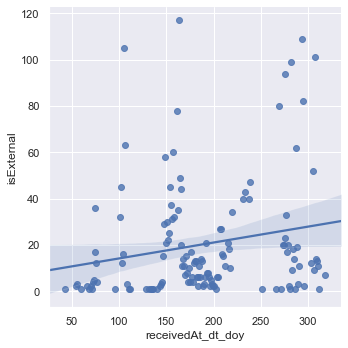

In [29]:
df_time110_1 = df_time110[df_time110['isExternal']<151]
sns.lmplot(y='isExternal', x='receivedAt_dt_doy', data=df_time110_1)

### Insights 10 Number of leads via external source is also increasing over time

 * Assuming maximum number of leads via <b>external source</b> in a day is 75

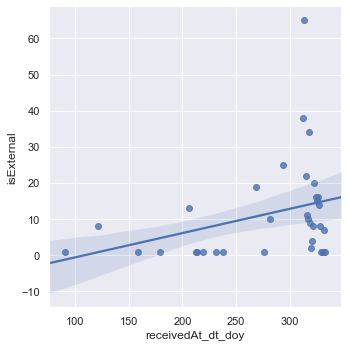

In [30]:
df_time111_1 = df_time111[df_time111['isExternal']<75]
sns.lmplot(y='isExternal', x='receivedAt_dt_doy', data=df_time111_1)

### Insights 11 Number of overall leads via external source as well as job assist is also increasing over time

 * Assuming maximum number of leads via <b>external source and job assist</b> in a day is 200

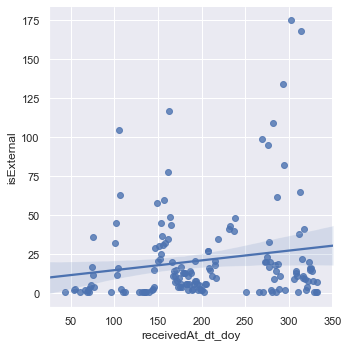

In [31]:
df_time11_1 = df_time11[df_time11['isExternal']<201]
sns.lmplot(y='isExternal', x='receivedAt_dt_doy', data=df_time11_1)

## Table 2: Telecallers

In [32]:
telecallers = pd.read_csv(r'E:\Amits_Jupyter_Projects\Vahan\telecallers.csv', encoding='latin1')
telecallers

,id,name,phoneNumber,createdAt
0,4248b521-ce3f-4897-a30d-35c9ee81f746,Amila,1234567890,2019-12-25T05:50:26.375Z
1,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Sheeba,1234567890,2019-12-25T05:50:26.385Z
2,7717ef5d-38ec-44df-af3b-7a2446071e48,Islam,1234567890,2019-12-25T05:50:26.388Z
3,89b29324-8f3b-4b50-b3f7-0a3e0918e4d2,Rakshith,1234567890,2019-12-25T05:50:26.390Z
4,87112942-9c14-401a-9231-d9b4c2eee0c5,Manasa,1234567890,2019-12-25T05:50:26.393Z


### Insights 12 
1. We have 5 Telecallers in our Company, Those are <b>Amila, Sheeba, Islam, Rakshith, and Manasa</b>
2. All the entries are created in Telecallers Table at the same time i.e, 2019-12-25 at 5:50 AM

* <b>We can delete phoneNumber and createdAt from Telecallers table as it is not required as of now</b>

In [33]:
telecallers = telecallers.drop(['phoneNumber', 'createdAt'], axis=1)
telecallers.columns = ['telecallerId', 'telecallerName']
telecallers

,telecallerId,telecallerName
0,4248b521-ce3f-4897-a30d-35c9ee81f746,Amila
1,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Sheeba
2,7717ef5d-38ec-44df-af3b-7a2446071e48,Islam
3,89b29324-8f3b-4b50-b3f7-0a3e0918e4d2,Rakshith
4,87112942-9c14-401a-9231-d9b4c2eee0c5,Manasa


## Table 3: Lead_Calls

In [34]:
lead_calls = pd.read_csv(r'E:\Amits_Jupyter_Projects\Vahan\lead_calls.csv', encoding='latin1')
lead_calls

,id,telecallerId,leadId,client,status,comments,calledAt,createdAt
0,00028a99-c401-4048-9b75-b923cff55a79,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,724467a5-52d1-4989-a870-99ae65d3e0e8,Amazon Flex,Not Interested - Applied by Mistake,NaN,2019-07-25T17:00:00Z,2019-12-26T17:32:49.297Z
1,00033b17-3a2a-4769-8623-bb00adf1e4c5,4248b521-ce3f-4897-a30d-35c9ee81f746,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,RNR,NaN,2019-10-10T17:30:00Z,2019-12-26T18:09:38.408Z
2,0003dcc7-05d0-4736-a415-5e67ea95c24e,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,fea7fb85-3355-4747-98fd-dae1b9aca52a,Lalamove,Not Interested - Disconnected the Call,NaN,2019-08-30T14:00:00Z,2019-12-26T17:42:55.007Z
3,00042f93-1e19-418f-bf38-1a8a8f758952,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,3308d114-a9ed-4d81-8d08-50b28171790f,Zomato,Not Interested,Not Looking for Job,2020-06-01T10:30:00Z,2019-12-26T17:26:36.333Z
4,0006f07e-f4d1-4387-8540-fc8bf6e67676,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,924cdffb-693f-4870-8179-d80571e1fc85,NaN,Not Applied,NaN,2020-04-01T10:30:00Z,2019-12-26T17:21:12.255Z
...,...,...,...,...,...,...,...,...
12330,ffd308fb-c87c-458f-8a5b-860f789388e0,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,59bd13e7-b4e4-4536-b6dd-a09fbb1246cf,Swiggy,CNP/Switched Off/Not Reachable,NaN,2019-08-01T11:30:00Z,2019-12-26T17:31:26.531Z
12331,ffd55ab8-d90a-4453-ac53-1f108feb0fd5,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,a12df870-e99d-4c60-9e1c-284b27f97c33,Lalamove,CNP/Switched Off/Not Reachable,NaN,2019-08-21T12:30:00Z,2019-12-26T17:42:54.500Z
12332,fff00176-26f1-4d97-a848-6cf5e2b988ae,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,751a1e41-78d6-4a62-864d-330b347d8358,Zomato,CNP/Switched Off/Not Reachable,NaN,2019-08-07T16:00:00Z,2019-12-26T17:43:58.563Z
12333,ffff35b1-cdc7-474a-98c5-06add6279b4e,89b29324-8f3b-4b50-b3f7-0a3e0918e4d2,00cc3717-3a32-4318-8b68-adac850897b6,Zomato,Not Interested - Others,Is a Btech MBA Graduate\nNot interested in doi...,2019-08-29T17:30:00Z,2019-12-26T17:48:47.624Z


### Feature Selection or Handling

1. Since lead_calls <b>id</b> is uniquely identify each row, So we can drop this feature 
2.  <b>telecallerId</b> of Lead_calls table is being replaced by <b>telecallerName</b> of Telecallers Table, Because we have only few telecallers which can be identified by their name also

In [35]:
lead_calls['id'].nunique()

12335

In [36]:
lead_calls = pd.merge(telecallers, lead_calls, on='telecallerId', how='inner')
lead_calls = lead_calls.drop(['id', 'telecallerId'], axis=1)
lead_calls

,telecallerName,leadId,client,status,comments,calledAt,createdAt
0,Amila,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,RNR,NaN,2019-10-10T17:30:00Z,2019-12-26T18:09:38.408Z
1,Amila,1ad38259-a8a7-4b70-b72a-0c5ab046ee99,Amazon Flex,CNP/Switched Off/Not Reachable,NaN,2019-08-07T15:30:00Z,2019-12-26T17:40:36.254Z
2,Amila,4f88e0a6-d944-4425-84bd-2a7cb1e5a266,Swiggy,CNP/Switched Off/Not Reachable,NaN,2019-08-01T15:30:00Z,2019-12-26T17:36:12.462Z
3,Amila,f14e3921-fe25-4344-8a3d-a261e2a258cc,Zomato,Very Interested,Going on Sat,2019-08-08T11:00:00Z,2019-12-26T17:52:58.332Z
4,Amila,c3054421-6f40-4573-a33e-a092649cc1fb,Swiggy,Wrong Number/Number Not Valid,NaN,2019-08-05T12:30:00Z,2019-12-26T17:36:17.400Z
...,...,...,...,...,...,...,...
12330,Rakshith,80bc8765-0b25-42b3-95e3-62ecfe4af33e,Zomato,Interested,Is a last year graduation student\nInterested ...,2019-09-02T12:30:00Z,2019-12-26T17:48:48.141Z
12331,Rakshith,c27d6673-f872-4878-b869-42a064a5848c,Zomato,Not Interested - Location Issue,Came to the centre\nDidn't get the location he...,2019-08-26T10:30:00Z,2019-12-26T17:47:38.363Z
12332,Rakshith,aa23bc8c-6e4d-4303-b97f-489838f8a35f,Zomato,Not Interested - Got Other Jobs,NaN,2019-08-26T15:00:00Z,2019-12-26T17:47:38.289Z
12333,Rakshith,ee6c175b-7c83-49f4-994c-b1ad971a1913,Zomato,Interested,10th pass\nWill come next monday 9 sep\nWorkin...,2019-09-02T13:00:00Z,2019-12-26T17:48:48.155Z


### Insights 13
* Calls made by telecallers are <b>not equally distributed</b>
* <b>Sheela has called maximum 8770 times</b>, After that <b>Amila 3206 times</b>, and <b>few calls were from Rakshith 359</b>
* There is <b>no call made from Islam and Manasa</b>, So We can ask them as well to make calls to the leads 

In [37]:
lead_calls['telecallerName'].value_counts()

Sheeba      8770
Amila       3206
Rakshith     359
Name: telecallerName, dtype: int64

In [38]:
lead_calls['createdAt'] = pd.to_datetime(lead_calls['createdAt'])
lead_calls['calledAt'] = pd.to_datetime(lead_calls['calledAt'])

### Insights 14 When did entries created in the table

 * on 26 Dec 2019 between 17:00 to 19:00

In [39]:
lead_calls['createdAt_dt_date'] = lead_calls['createdAt'].dt.date
lead_calls['createdAt_dt_date'].value_counts()

2019-12-26    12335
Name: createdAt_dt_date, dtype: int64

In [40]:
lead_calls['createdAt_dt_hour'] = lead_calls['createdAt'].dt.hour
lead_calls['createdAt_dt_hour'].value_counts()

17    8585
18    3750
Name: createdAt_dt_hour, dtype: int64

In [41]:
lead_calls.drop(['createdAt_dt_date', 'createdAt_dt_hour', 'createdAt'], axis=1, inplace=True)

### Insights 15 time of the call

 * Dates are between <b>9 July 2019 to 30 Aug 2020</b>
 * Majority of people received on <b>2020-05-01, 2020-04-01, 2020-06-01, 2019-10-10, 2019-08-06, 2019-07-30, 2019-08-13, 2019-08-20, 2019-07-22, 2019-07-19</b> respectively

In [42]:
lead_calls['calledAt_dt_date'] = lead_calls['calledAt'].dt.date
lead_calls['calledAt_dt_date'].value_counts().head(10)

2020-05-01    1872
2020-04-01    1308
2020-06-01    1001
2019-10-10     461
2019-08-06     291
2019-07-30     253
2019-08-13     249
2019-08-20     228
2019-07-22     226
2019-07-19     216
Name: calledAt_dt_date, dtype: int64

In [43]:
lead_calls.drop(['calledAt'], axis=1, inplace=True)

In [44]:
lead_calls['calledAt_dt_date'].min()

datetime.date(2016, 8, 26)

In [45]:
lead_calls[lead_calls['calledAt_dt_date']>datetime.date(2016, 8, 26)]['calledAt_dt_date'].min()

datetime.date(2019, 7, 9)

In [46]:
lead_calls['calledAt_dt_date'].max()

datetime.date(2020, 8, 30)

### Insights 16 Number of leads called how many times
* telecallers called only <b>once to 8316</b> different leads <b>83.86 % leads</b>
* telecallers called only <b>twice to 969</b> different leads <b>9.77 % leads</b>
* telecallers called only <b>thrice to 534</b> different leads <b>5.38 % leads</b>
* telecallers called only <b>4 times to 58</b> different leads <b>0.58 % leads</b>

In [47]:
# lead_calls['leadId'].value_counts().value_counts()
lead_calls['leadId'].value_counts().value_counts(normalize=True)*100

1     83.864461
2      9.772086
3      5.385236
4      0.584913
6      0.171440
5      0.161355
8      0.020169
23     0.010085
7      0.010085
10     0.010085
9      0.010085
Name: leadId, dtype: float64

In [48]:
lead_calls

,telecallerName,leadId,client,status,comments,calledAt_dt_date
0,Amila,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,RNR,NaN,2019-10-10
1,Amila,1ad38259-a8a7-4b70-b72a-0c5ab046ee99,Amazon Flex,CNP/Switched Off/Not Reachable,NaN,2019-08-07
2,Amila,4f88e0a6-d944-4425-84bd-2a7cb1e5a266,Swiggy,CNP/Switched Off/Not Reachable,NaN,2019-08-01
3,Amila,f14e3921-fe25-4344-8a3d-a261e2a258cc,Zomato,Very Interested,Going on Sat,2019-08-08
4,Amila,c3054421-6f40-4573-a33e-a092649cc1fb,Swiggy,Wrong Number/Number Not Valid,NaN,2019-08-05
...,...,...,...,...,...,...
12330,Rakshith,80bc8765-0b25-42b3-95e3-62ecfe4af33e,Zomato,Interested,Is a last year graduation student\nInterested ...,2019-09-02
12331,Rakshith,c27d6673-f872-4878-b869-42a064a5848c,Zomato,Not Interested - Location Issue,Came to the centre\nDidn't get the location he...,2019-08-26
12332,Rakshith,aa23bc8c-6e4d-4303-b97f-489838f8a35f,Zomato,Not Interested - Got Other Jobs,NaN,2019-08-26
12333,Rakshith,ee6c175b-7c83-49f4-994c-b1ad971a1913,Zomato,Interested,10th pass\nWill come next monday 9 sep\nWorkin...,2019-09-02
